In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('height_weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 0, 'Height')

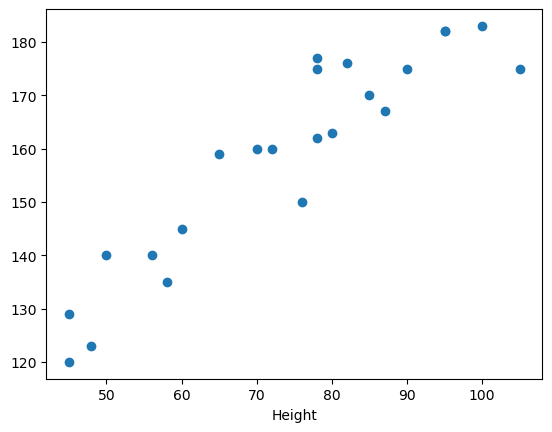

In [6]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.xlabel("Height")

In [7]:
## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.926154
Height,0.926154,1.000000


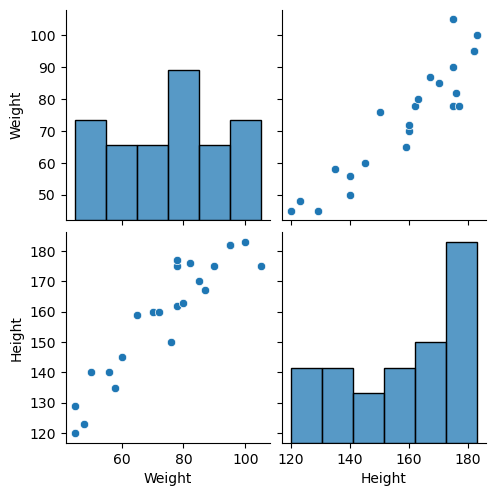

In [9]:
## seaborn for visulaization
import seaborn as sns
sns.pairplot(df)

In [18]:
## independent and dependent features
X=df[['Weight']] ### independent feture should be dataframe or 2d array
y=df['Height'] ### dependent feature can be series or 2d array
X.shape ## (23,1) - 2d/datafram
y.shape ## (23,) - 1d/series

(23,)

In [15]:
## Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape

(17, 1)

In [19]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [22]:
## apply simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [23]:
print("Coefficient or slope", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficient or slope [17.2982057]
Intercept: 156.47058823529412


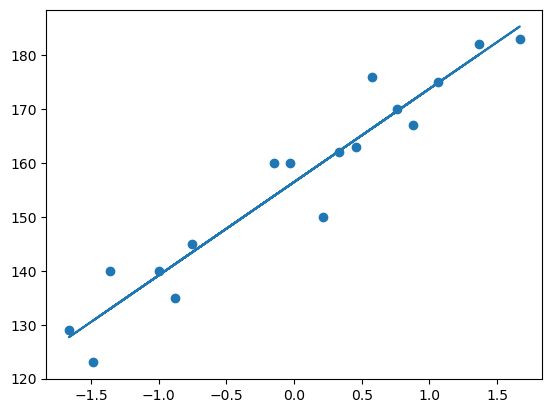

In [24]:
## plot training data - best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train))

## Prediction for test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 156.470 + 1.26(X_test)

In [30]:
## prediction for test data
y_pred=regression.predict(X_test)
regression.predict(X_test)

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [33]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

131.8990309418232
10.498459220128339
11.484730338228374


## R Square
**R^2 = 1 - SSR/SST** <br />
R^2 = coefficient determination  <br />
SSR = sum of squares of residuals <br />
SST = total sum of squares <br />


In [34]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred)
print(score)

0.7061655251296017


## Adjusted R2 <br />
R2 = 1 - [(1-R2)*(n-1)/(n-k-1)] <br />
where: <br />
r2 : the R2 of the model <br />
n : the number of observations <br />
k : the number of predictor variables 


In [36]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6327069064120021

In [37]:
## OLS Linear Regression    
import statsmodels.api as sm

model=sm.OLS(y_train,X_train).fit()

prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 30 Dec 2024   Prob (F-statistic):                       0.664
Time:                        15:43:44   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\hp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
